In [9]:
import numpy as np
from collections import Counter 
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [101]:
class Naive_bayes:
    
    def __init__(self,priors=None):
        #if priors are known
        self.priors = priors
        
    def fit(self,X,y):
        #getting class data
        n_samples,n_features = X.shape
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        
        #initiating arrays
        self.mean = np.zeros((num_classes,n_features),dtype = np.float64)
        self.var = np.zeros((num_classes,n_features),dtype = np.float64)
        self.priors = np.zeros(num_classes,dtype = np.float64)
        
        #using enumerate to setting custom index
        for idx, i in enumerate(self.classes):
            #fetching all the value of x where y is equals to i (0,1,..)
            X_c = X[i==y]
            self.mean[idx,:] = X_c.mean(axis=0)
            self.var[idx,:] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0]
            
    def predict(self,X):  
        y_predict = [self._predict(x) for x in X]
        return np.array(y_predict)
    
    def _predict(self,X):
        #created empty list to add likelihoods
        likelihoods = []
        
        for idx, i in enumerate(self.classes):
            #applying log for normalization
            prior = np.log(self.priors[idx])
            #adding all the values
            class_likelihood = np.sum(np.log(self._pdf(idx,X)))
            likelihood =  prior+class_likelihood
            likelihoods.append(likelihood)  
        #np.argmax(likelihoods) --> return the index of maximum likelihood in likelihoods
        return self.classes[np.argmax(likelihoods)]
            
    def _pdf(self,idx,x):
        #function to find the pdf of feaetures x of class idx
        mean = self.mean[idx]
        var = self.var[idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator    

In [102]:
from sklearn.model_selection import train_test_split
data = load_iris()
X,y = data.data,data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

In [105]:
model = Naive_bayes()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [108]:
from sklearn.metrics import f1_score,confusion_matrix

<AxesSubplot:>

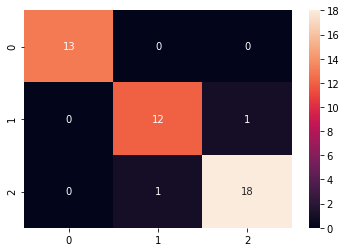

In [110]:
import seaborn as sns
clf = confusion_matrix(y_test,y_pred)
sns.heatmap(clf, annot=True)